In [ ]:
# This is a demonstration of making a plot based on data I scraped from a web page 
# using regular expressions.

In [6]:
# import packages
import bs4 as beutifulsoup
import urllib
import re as re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
# I am going to explore the number of publications produced in
# the Fox Lab using the data from the lab website.
# download web page using URL
URL = 'https://foxlab.ucdavis.edu/category/publications.html'
r = urllib.request.urlopen(URL).read()
print(type(r))

<class 'bytes'>


In [8]:
# parse web page using beutifulsoup
webpage = beutifulsoup.BeautifulSoup(r)
print(type(webpage))
webpage = webpage.prettify()
print(type(webpage))

<class 'bs4.BeautifulSoup'>
<class 'str'>


In [9]:
# this web page contains information about the publications produced in the 
# Fox Lab starting from 2004. There are some patterns in the format of the
# web page that could be used to scrap data:
# 1) for each publication, the year of publication is always indicated within parenthesis ()
# 2) for each publication, information of authorship precedes the year of publication.
# 3) each publication is an item in a list, which is indicated by <li> </li>. There is also
# a <div> tag before <li> tag.

# define a pattern that matches both the authorship and the year of publication
pattern ='<div>\W*<li>\W*(?P<author>.+\W+)\(\W*(?P<year>\d+)\W*\)'
# store the matched information in a list
my_list=re.findall(pattern, webpage)
# take a look at the list, it is a list of tuples
print(my_list)
# turn the list into a data frame
df = pd.DataFrame(my_list, columns=['authors', 'year'])
df

[('Chuapoco MR,   Flytzanis NC,   Goeden N,   Octeau JC,   Roxas KM,   Chan KY,   Scherrer J,   Winchester J,   Blackburn RJ,   Campos LJ,   Arokiaraj CM,   Miles TF,   Jang MJ,   Vendemiatti J,   Deverman BE,   Pickel J,   Fox AS,   Gradinaru V     ', '2022'), ('Fox AS,   Harris RA,   Del Rosso L,   Raveendran M,   Kamboj S,   Kinnally EL,   Capitanio JP,   Rogers J     ', '2021'), ('Roseboom PH,   Mueller SAL,   Oler JA,   Fox AS,   Riedel MK,   Elam VR,   Olsen ME,   Gomez JL,   Boehm MA,   DiFilippo AH,   Christian BT,   Michaelides M,   Kalin NH     ', '2021'), ('Wang X,   Li XH,   Cho JW,   Russ BE,   Rajamani N,   Omelchenko A,   Ai L,   Korchmaros A,   Sawiak S,   Benn RA,   Garcia-Saldivar P,   Wang Z,   Kalin NH,   Schroeder CE,   Craddock RC,   Fox AS,   Evans AC,   Messinger A,   Milham MP,   Xu T     ', '2021'), ('Klink PC,   Aubry J-F,   Ferrera V,   Fox AS,   Froudist-Walsh S,   Jarray B,   Konofagou E,   Krauzlis R,   Messinger A,   Mitchell AS,   Ortiz-Rios M,   Oya H,

,authors,year
0,"Chuapoco MR, Flytzanis NC, Goeden N, Oct...",2022
1,"Fox AS, Harris RA, Del Rosso L, Raveendr...",2021
2,"Roseboom PH, Mueller SAL, Oler JA, Fox A...",2021
3,"Wang X, Li XH, Cho JW, Russ BE, Rajama...",2021
4,"Klink PC, Aubry J-F, Ferrera V, Fox AS, ...",2021
...,...,...
80,"Fox AS, Oakes TR, Shelton SE, Converse A...",2005
81,"Oakes TR, Johnstone T, Ores Walsh KS, Gr...",2005
82,"Kalin NH, Shelton SE, Fox AS, Oakes TR, ...",2005
83,"Nitschke JB, Nelson EE, Rusch BD, Fox AS...",2004


col_0  count
year        
2004       2
2005       3
2006       2
2007       1
2008       2
2009       3
2010       3
2011       2
2012       4
2013       3
2014       5
2015       7
2016       7
2017       2
2018      19
2019       9
2020       3
2021       7
2022       1


Text(0, 0.5, 'number of publications')

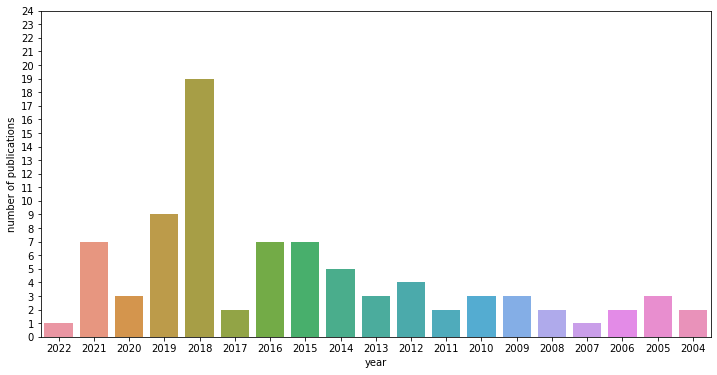

In [10]:
# make a frequency table for number of publications per year
print(pd.crosstab(index=df['year'], columns='count'))
# plot the number of publication by year
fig= plt.figure(figsize=(12,6))
ax= plt.subplot()
ax= sns.countplot(x='year',data=df)
plt.yticks(np.arange(0, 25, step=1))
plt.ylabel("number of publications")